In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch
import cv2
import glob

import sys
sys.path.append("../../") # include parent dir

from jlonevae_lib.architecture.load_model import load_model
import jlonevae_lib.architecture.vae_jacobian as vj

In [2]:
# see dataset formatting instructions
# at https://github.com/rr-learning/disentanglement_dataset
rawdata = np.load("../../data/mpi3d_real/mpi3d_real.npz")['images']

In [3]:
rawdata.shape

(1036800, 64, 64, 3)

In [4]:
#inds has four rows, each row has a list of data indices for images to use
# shape is 4 by num, and the values are all between 0 and 1036800-1
def get_multi_data(allinds):
    inner_imgs = []
    for quartinds in allinds:
        inner_imgs.append(rawdata[quartinds][:,0:64:2,0:64:2,:] / 255.)
    # combine all 4 sampled images into one image
    # index 0 of inner_imgs is image sample number
    #print(inner_imgs[0].shape)
    return np.concatenate((
                 np.concatenate((inner_imgs[0],inner_imgs[1]),axis=1),
                 np.concatenate((inner_imgs[2],inner_imgs[3]),axis=1)), axis=2).transpose(0,3,1,2)

In [5]:
def get_data(all_factors=None):
    factor_sizes = [6, 6, 2, 3, 3, 40, 40]
    factor_bases = np.prod(factor_sizes) / np.cumprod(
            factor_sizes)
    if all_factors is None:
        all_factors = np.random.randint(40,size=(4,7))
        all_factors[:,0] = 3
        all_factors[:,1] = 1
        all_factors[:,2] = 1 
        all_factors[:,3] = 0 
        all_factors[:,4] = 2 
    allinds = np.array(np.dot(all_factors, factor_bases), dtype=np.int64).reshape([4,1])
    imgs = get_multi_data(allinds)
    return imgs

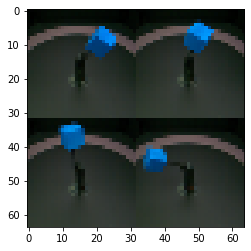

In [6]:
# I forgot to save the initial seeds, so I've reverse-engineered them by trial and error
all_factors = np.zeros((4,7))
all_factors[:,0] = 3
all_factors[:,1] = 1
all_factors[:,2] = 1 
all_factors[:,3] = 0 
all_factors[:,4] = 2
all_factors[0,5:7] = [13,0] # 13,0
all_factors[1,5:7] = [22,10] # 22,10
all_factors[2,5:7] = [16,3] # 16,3
all_factors[3,5:7] = [6,32] # 6,32
plt.imshow(get_data(all_factors)[0].transpose(1,2,0))

# Embed into model

In [7]:
combinedOutputs = "trainedMPI3DModels/trainedModels"

In [8]:
device="cpu"
def get_model_and_enc(gammastring, data, timestamp="*"):
    matching_model_paths = glob.glob(f"../../{combinedOutputs}/defaultConv_lone_beta0_0100_ica{gammastring}_lat10_batch64_lr0_0001_anneal100000/{timestamp}/representation/cache_batch_no300000")
    model_path = matching_model_paths[0]
    print(model_path)
    model = load_model(model_path,device).double();
    encoding, logvar = model.encode(torch.tensor(data).double().to(device));
    return model, encoding

# Find the most active columns and plot them 

In [9]:
outputdir = "./mpi3dMultiJacobians/"
from pathlib import Path
Path.mkdir(Path(outputdir), exist_ok=True)

../../trainedMPI3DModels/trainedModels/defaultConv_lone_beta0_0100_ica0_0100_lat10_batch64_lr0_0001_anneal100000/20210528-025815/representation/cache_batch_no300000


/home/helvellyn/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.


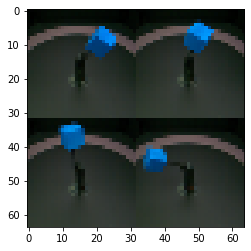

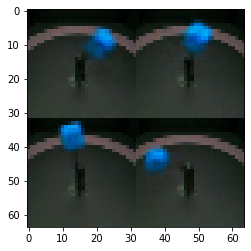

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 64, 64)


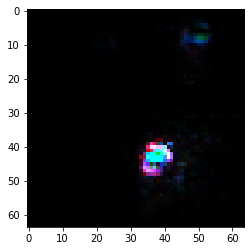

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


8.168821622536754e-08 6.436746734515184
(3, 64, 64)


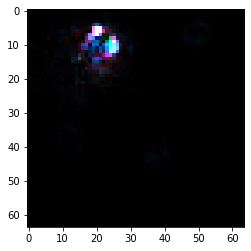

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


5.8597556627024785e-08 5.2533239865649675
(3, 64, 64)


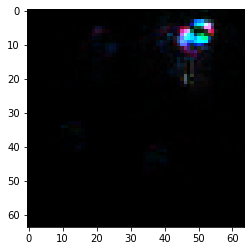

2.7174612562091685e-08

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 3.59888184220469
(3, 64, 64)


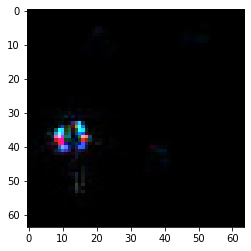

4.138061534695215e-08 3.643289576209609
(3, 64, 64)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


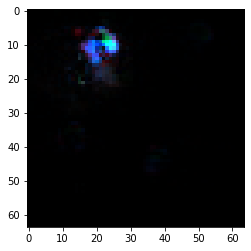

2.488926737770466e-08 2.636359391407641
(3, 64, 64)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


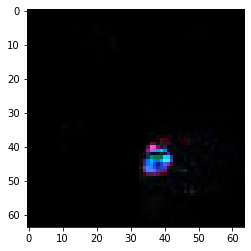

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


8.027863984848409e-08 2.45473470727347
(3, 64, 64)


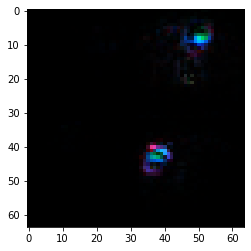

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1.3710680171019968e-07 1.5946956360278055
(3, 64, 64)


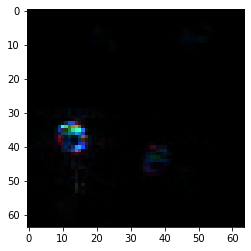

4.7908399348157824e-08 2.0102252586723206
(3, 64, 64)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


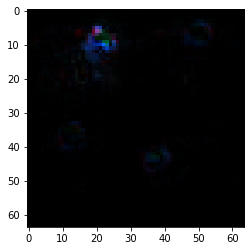

1.2543830255612517e-08 1.0200495279887123
(3, 64, 64)


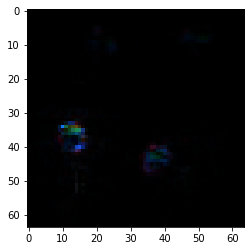

6.898782205207982e-08 0.9639091860313886
../../trainedMPI3DModels/trainedModels/defaultConv_lone_beta0_0100_ica0_0000_lat10_batch64_lr0_0001_anneal100000/20210527-235110/representation/cache_batch_no300000


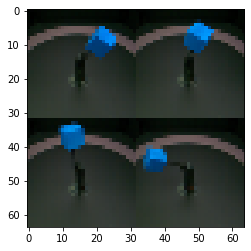

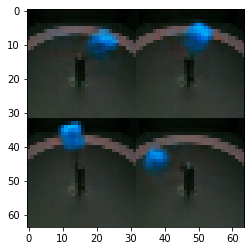

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 64, 64)


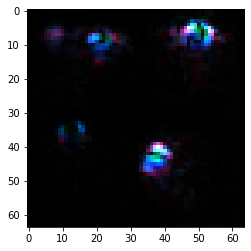

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2.1129973435071382e-06 3.1398606464821626
(3, 64, 64)


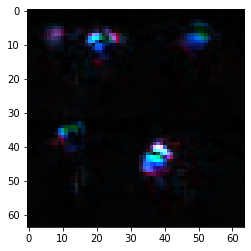

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


6.304326358593975e-06 3.425726289097834
(3, 64, 64)


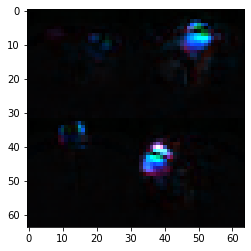

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1.0437015902171234e-05 3.0356818625274222
(3, 64, 64)


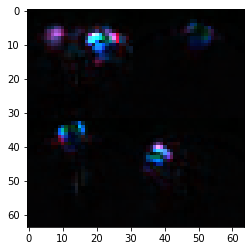

2.3240396051621273e-06 3.4961328504130478
(3, 64, 64)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


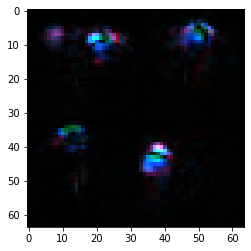

2.1976689106875513e-07 2.4773814487112484
(3, 64, 64)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


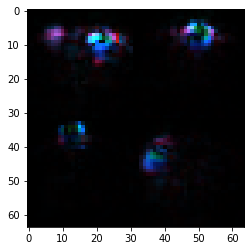

1.1206288945901972e-07 3.1221210956311576
(3, 64, 64)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


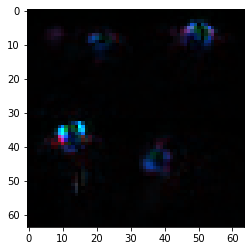

1.5104912382757564e-06 1.9647711316802985
(3, 64, 64)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


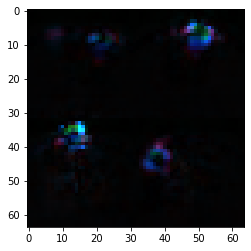

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


8.695561907936077e-07 2.352605334172187
(3, 64, 64)


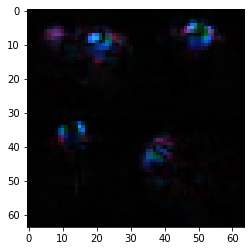

9.122101653152486e-06 1.6243306614879367
(3, 64, 64)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


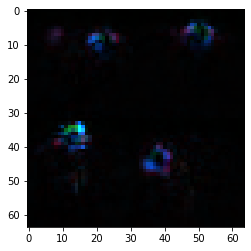

2.0505341249440957e-07 2.021725281875071


In [10]:
data = get_data(all_factors)
for gammastring, timestamp in (("0_0100","20210528-025815"), ("0_0000", "20210527-235110")):
    model, encoding = get_model_and_enc(gammastring,data, timestamp)
    rec = model.decode(torch.tensor(encoding).double().to(device))
    rec = rec.detach().cpu().numpy()[0].transpose(1,2,0)
    plt.imshow(data[0].transpose(1,2,0));plt.show();plt.close();
    # convert RGB to BGR and scale to 0-255
    cv2.imwrite(outputdir+"Mpi3dMulti-ExampleImage.png", (data[0].transpose(1,2,0)*255)[:,:,(2,1,0)]);
    plt.imshow(rec);plt.show();plt.close();
    cv2.imwrite(outputdir+f"Mpi3dMulti-ReconImageGamma{gammastring}.png", (rec*255)[:,:,(2,1,0)]);
    # contrast adjustment for jacobian
    scale = 5
    jacs = vj.compute_generator_jacobian_analytic(model, encoding, device=device,
                                        im_channels=3)#.detach().cpu().numpy()
    activities = [np.sum(np.square(jac)) for jac in jacs]
    top_jac_inds = np.flip(np.argsort(activities))
    gsc = np.std(np.abs(jacs))
    for q, ind in enumerate(top_jac_inds):
        print(jacs[ind].squeeze().shape)
        added_constrast_jac = jacs[ind,0].transpose(1,2,0) /gsc * 0.1
        added_constrast_jac = np.abs(added_constrast_jac)
        plt.imshow(added_constrast_jac);plt.show();plt.close();
        print(np.min(added_constrast_jac), np.max(added_constrast_jac))
        cv2.imwrite(outputdir+"Mpi3dMulti-JacGamma%sLatent%d.png" %(gammastring,q), 255*added_constrast_jac[:,:,(2,1,0)]);